In [364]:
import pandas as pd
import pandas as pd
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import tree
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# __1. Decision Trees as Interpretable Models__

## __(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations__

In [365]:
# https://www.w3schools.com/python/ref_file_readlines.asp]
# https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html

path="../data/diagnosis.data"
path2="../data/diagnosis.names"
data=[]
with open(path2, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        if lines[i].startswith("Attribute Information"):  
            # print(lines[i])
            for j in range(i+2,i+10,1):
                line=lines[j]
                k=line.index('{')
                attri_info_data=line[3:k-1]
                data.append(attri_info_data)
print("Data is:\n {}" .format(data))

data_diagnosis=pd.read_csv(path,sep="\t+", decimal=",", encoding="UTF-16", names=data, engine='python')
for i in data_diagnosis.columns[1:]:
    data_diagnosis[i]=data_diagnosis[i].map({'yes': 1, 'no': 0})
print("\nDiagnosis data is: ")
data_diagnosis

Data is:
 ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing (continuous need for urination)', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet', 'decision: Inflammation of urinary bladder', 'decision: Nephritis of renal pelvis origin']

Diagnosis data is: 


,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


### __(b) Build a decision tree on the whole data set and plot it.__

In [366]:
# https://stackoverflow.com/questions/57854228/pandas-dataframe-index-to-list-vs-tolist
whole_data=data_diagnosis.columns[:-2].to_list()
print("Features are:\n {}" .format(whole_data))

Features are:
 ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing (continuous need for urination)', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet']


In [367]:
# Converting multi label data into a multi class data set using label powerset method
# http://scikit.ml/api/skmultilearn.problem_transform.lp.html
# https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_val = data_diagnosis.iloc[:,:-2].values
target_variables=data_diagnosis.iloc[:,-2:]
new_target = LabelPowerset(classifier = DecisionTreeClassifier()).transform(target_variables)
Y_val = new_target
X_train,X_test,Y_train,Y_test = train_test_split(X_val, Y_val, test_size=0.2, random_state=0)

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(X_train, Y_train)
#predict
predictions = classifier.predict(X_test)
# accuracy
accuracy_scr = accuracy_score(Y_test, predictions)
print("Accuracy score is : {}" .format(accuracy_scr))

Accuracy score is : 1.0


DECISION TREE : 


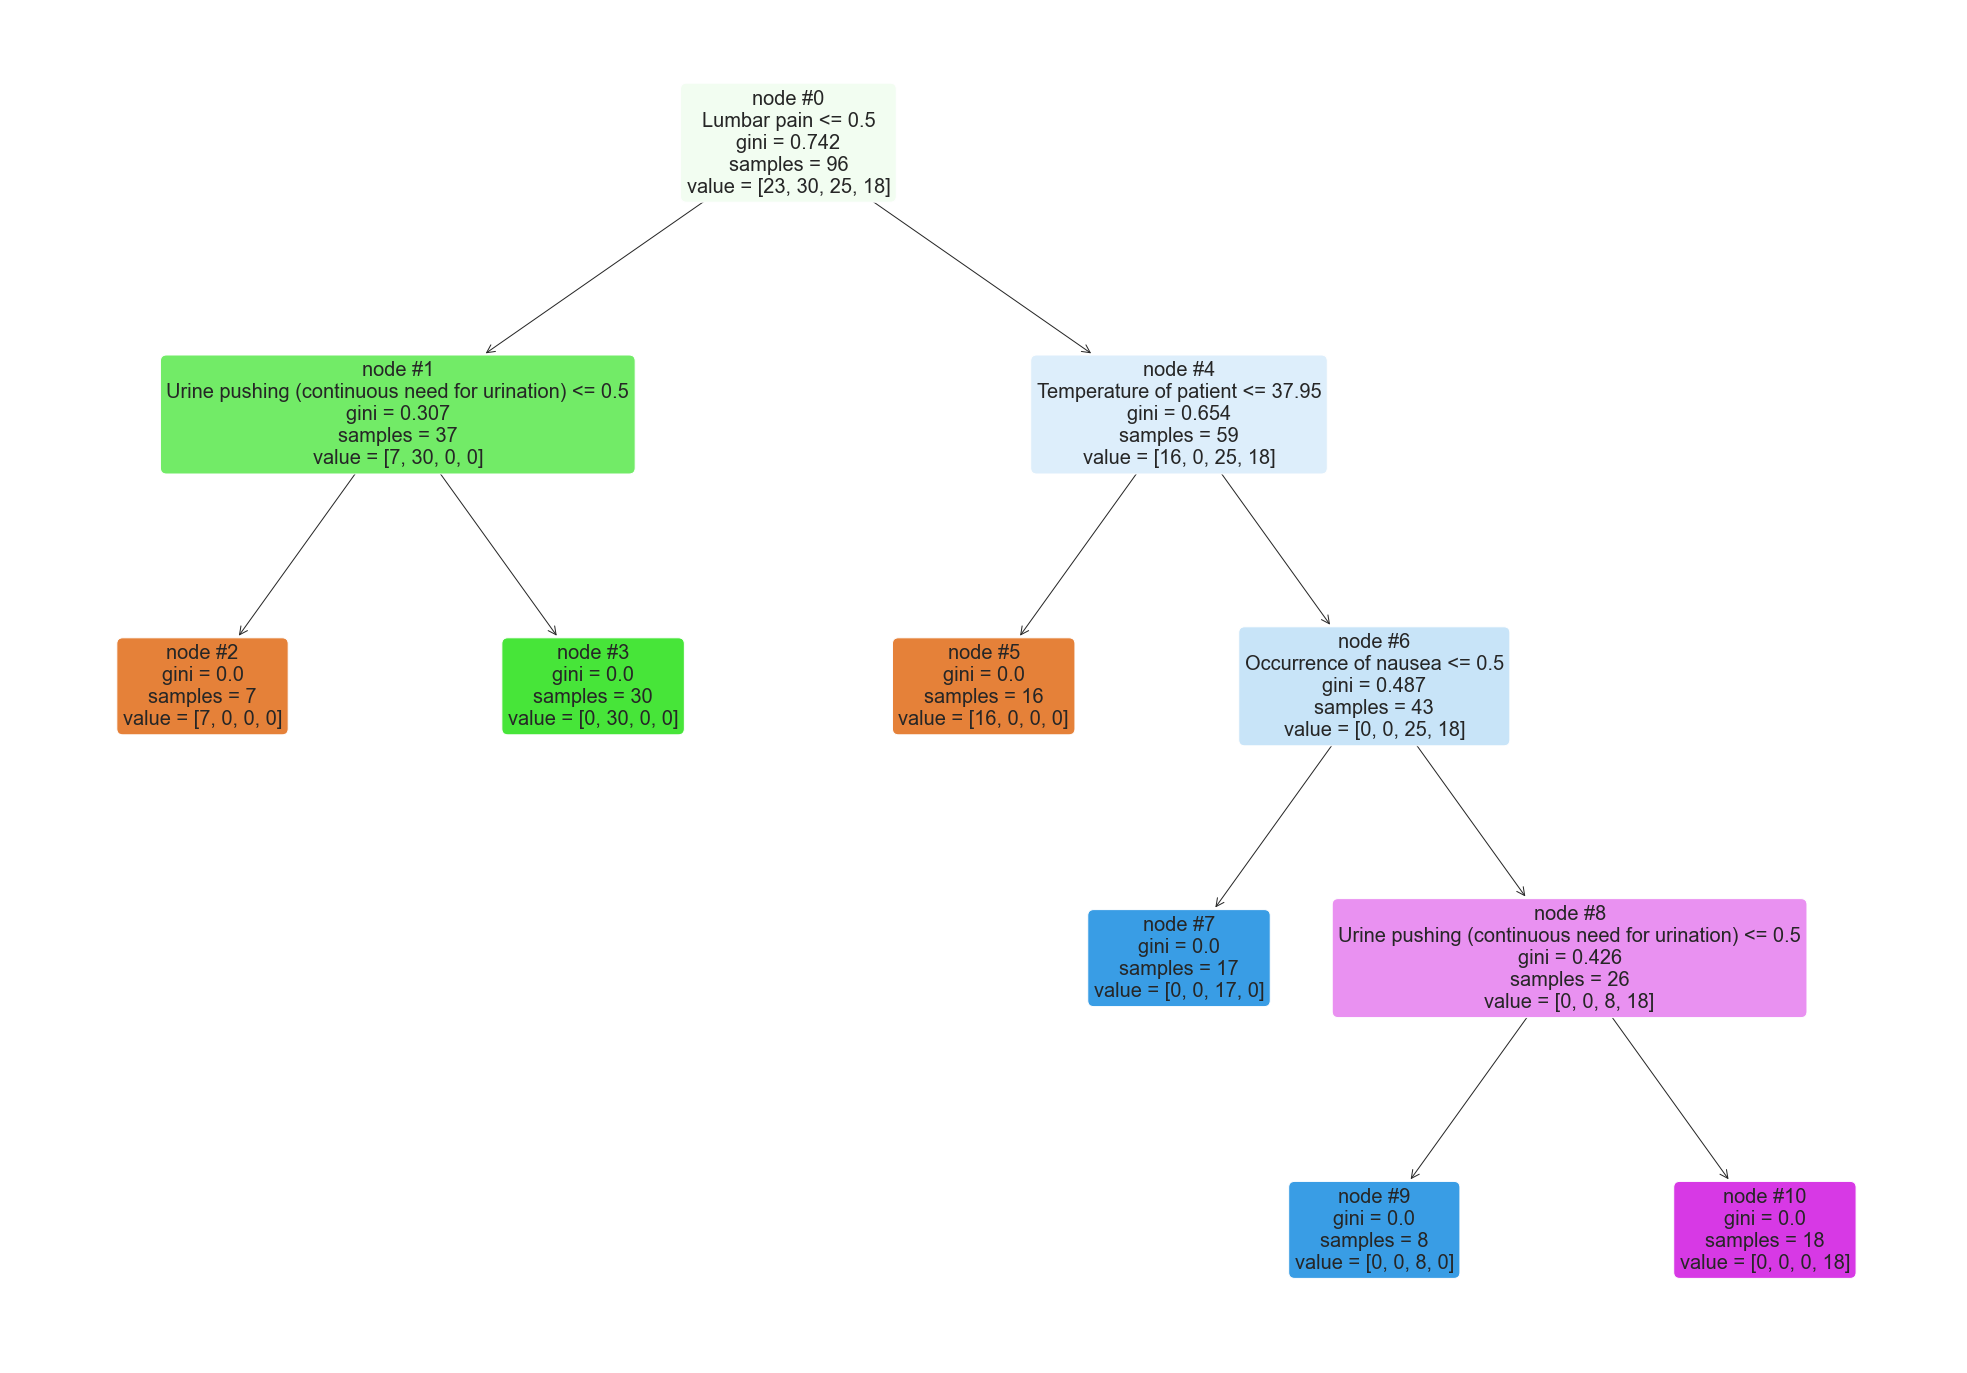

In [368]:
# Plotting decision tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
print("DECISION TREE : ")
plt.figure(figsize=(35,25))
tree.plot_tree(classifier,feature_names=whole_data,filled=True,rounded=True,fontsize=20, node_ids = True)
plt.show()

###  __(c) Convert the decision rules into a set of IF-THEN rules__

In [369]:
def dec_rules(tree, feature_names):
	tree_left = tree.tree_.children_left
	tree_right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	whole_data = [feature_names[i] for i in tree.tree_.feature]
	tree_value = tree.tree_.value
	def rules(tree_left, tree_right, threshold, whole_data, node, depth=0):
		indentation = "  " * depth
		if (threshold[node] != -2):
			print(indentation,"if ( " + whole_data[node] + " <= " + str(threshold[node]) + " ) {")
			if tree_left[node] != -1:
				rules (tree_left, tree_right, threshold, whole_data, tree_left[node], depth+1)
				print(indentation,"} else {")
				if tree_right[node] != -1:
					rules (tree_left, tree_right, threshold, whole_data, tree_right[node], depth+1)
				print(indentation,"}")
		else:
			print(indentation,"return " + str(tree_value[node]))
	rules(tree_left, tree_right, threshold, whole_data, 0)

In [370]:
print("Descision rules into set of IF-THEN rules are:\n")
dec_rules(classifier, whole_data)

Descision rules into set of IF-THEN rules are:

 if ( Lumbar pain <= 0.5 ) {
   if ( Urine pushing (continuous need for urination) <= 0.5 ) {
     return [[7. 0. 0. 0.]]
   } else {
     return [[ 0. 30.  0.  0.]]
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[16.  0.  0.  0.]]
   } else {
     if ( Occurrence of nausea <= 0.5 ) {
       return [[ 0.  0. 17.  0.]]
     } else {
       if ( Urine pushing (continuous need for urination) <= 0.5 ) {
         return [[0. 0. 8. 0.]]
       } else {
         return [[ 0.  0.  0. 18.]]
       }
     }
   }
 }


### __(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.__

scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.
As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

ccp_alphas : [0.         0.10901163 0.11824324 0.1838129  0.22189108]


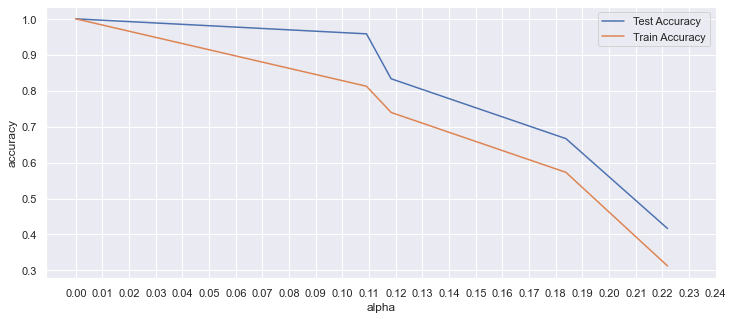

In [371]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#:~:text=Cost%20complexity%20pruning%20provides%20another,the%20number%20of%20nodes%20pruned.

# pruning method - ccp_alpha 
path=classifier.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas=path['ccp_alphas']
print("ccp_alphas : {}" .format(ccp_alphas))

train_scores, test_scores=[],[]
for i in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X_train,Y_train)
    # prediction
    Y_train_pred = tree.predict(X_train)
    Y_test_pred = tree.predict(X_test)
    # accuracy
    train_scores.append(accuracy_score(Y_train,Y_train_pred))
    test_scores.append(accuracy_score(Y_test, Y_test_pred))

# plotting the graph
sns.set()
plt.figure(figsize = (12,5))
sns.lineplot(y = test_scores,x = ccp_alphas, label = "Test Accuracy")
sns.lineplot(y = train_scores,x = ccp_alphas, label = "Train Accuracy")
plt.xticks(ticks = np.arange(0.00,0.25,0.01))
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.show()

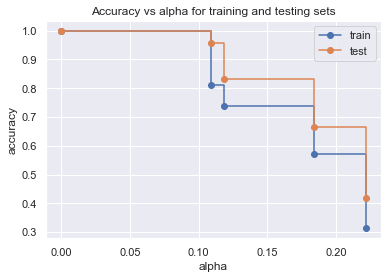

In [372]:
# Plotting train and test accuracy
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

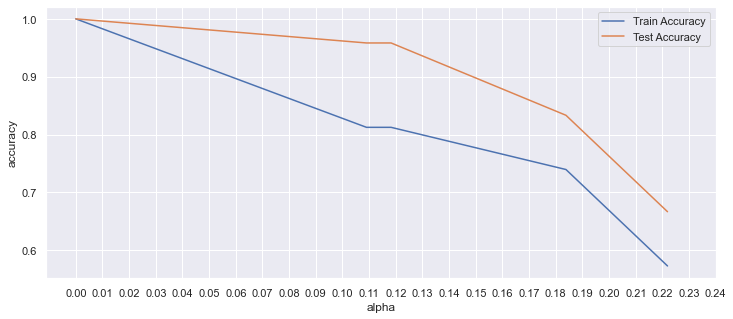

In [373]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# pruning method - min_impurity_decrease
train_scores, test_scores=[],[]
for i in ccp_alphas:
    tree = DecisionTreeClassifier(min_impurity_decrease=i)
    tree.fit(X_train,Y_train)
    # prediction
    Y_train_pred = tree.predict(X_train)
    Y_test_pred = tree.predict(X_test)
    # accuracy
    train_scores.append(accuracy_score(Y_train,Y_train_pred))
    test_scores.append(accuracy_score(Y_test, Y_test_pred))

# plotting the graph
sns.set()
plt.figure(figsize = (12,5))
sns.lineplot(y = train_scores,x = ccp_alphas, label = "Train Accuracy")
sns.lineplot(y = test_scores,x = ccp_alphas, label = "Test Accuracy")
plt.xticks(ticks = np.arange(0.00,0.25,0.01))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

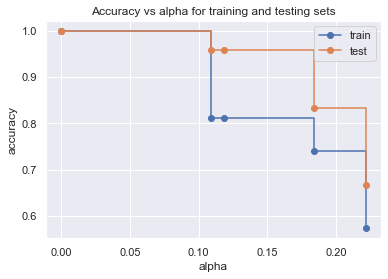

In [374]:
# Plotting train and test accuracy
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

From the above plots, we can see for ccp_alpha=0, we get the maximum test accuracy. Our model is now more generalized and it will perform better on unseen data.

In [375]:
classifier = DecisionTreeClassifier(random_state=1,ccp_alpha=0)
classifier.fit(X_train, Y_train)
# predict
predictions = classifier.predict(X_test)
# accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy score is : {}" .format(accuracy))
print("\nDescision rules:\n ")

dec_rules(classifier, data_diagnosis.columns[:-2].to_list())

Accuracy score is : 1.0

Descision rules:
 
 if ( Lumbar pain <= 0.5 ) {
   if ( Urine pushing (continuous need for urination) <= 0.5 ) {
     return [[7. 0. 0. 0.]]
   } else {
     return [[ 0. 30.  0.  0.]]
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[16.  0.  0.  0.]]
   } else {
     if ( Occurrence of nausea <= 0.5 ) {
       return [[ 0.  0. 17.  0.]]
     } else {
       if ( Urine pushing (continuous need for urination) <= 0.5 ) {
         return [[0. 0. 8. 0.]]
       } else {
         return [[ 0.  0.  0. 18.]]
       }
     }
   }
 }
